In [6]:
# Initialize Otter
import otter
grader = otter.Notebook("hw1.ipynb")

ModuleNotFoundError: No module named 'otter'

# CPSC 330 - Applied Machine Learning 

## Homework 1: Programming with Python  

**Due date: See the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/calendar.html)**. 

### About this assignment:
The main purpose of this assignment is to check whether your programming knowledge is adequate to take CPSC 330. This assignment covers two python packages, `numpy` and `pandas`, which we'll be using throughout the course. For some of you, Python/numpy/pandas will be familiar; for others, it will be new. Either way, if you find this assignment very difficult then that could be a sign that you will struggle later on in the course. While CPSC 330 is a machine learning course rather than a programming course, programming will be an essential part of it.

Also, as part of this assignment you will likely need to consult the documentation for various Python packages we're using. This is, of course, totally OK and in fact strongly encouraged. Reading and interpreting documentation is an important skill, and in fact is one of the skills this assignment is meant to assess. That said, do not use Large Language Model tools such as ChatGPT to complete your assignment; it would be self-deceptive and by doing so you will only be hurting your own learning, especially in this assignment.  

For Python refresher, check out [Python notes](https://ubc-cs.github.io/cpsc330-2025W1/docs/python_notes.html) and [Python resources](https://ubc-cs.github.io/cpsc330-2025W1/docs/resources.html#python-resources). 

### Set-up

In order to do this assignment and future assignments, you will need to set up the CPSC 330 software stack, which is Python and Jupyter. For software install help, see [here](https://ubc-cs.github.io/cpsc330-2025W1/docs/setup.html). Once you have the software stack installed, you should be able to run the next cell, which imports some packages needed for the assignment.

Setting up the software stack can be frustrating and challenging. But remember that it is an integral part of becoming a data scientist or machine learning engineer. This is going to be a valuable skill for your future self. Make the most of the tutorials available this week, as the TAs are ready to assist you with the setup. 

Imports
------

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Points
------

Each question or sub-question will have a number of points allocated to it, which is indicated right below the question. 

<br><br>

<!-- BEGIN QUESTION -->

## Instructions  
rubric={points}  

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

**PLEASE READ CAREFULLY:**  

1. **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.  
2. **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.  
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
3. **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.  
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
4. **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.  
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
5. **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 
   

_Points:_ 6

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Exercise 1: Loading files with Pandas
rubric={points}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the `data/` folder of this homework repo, there are six files named `wine_#.csv`/`wine_#.txt`. For each file, load it into a pandas `DataFrame` so that it resembles the following. **Use the `Bottle` column as the index.** Files are intentionally inconsistent, so you'll need the right `pd.read_csv(...)` options (e.g., `delimiter`, `header`, `usecols`, etc.).

![](img/hw1-table.png)

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types. Try checking `df.index`, `df.columns`, or `df.info()`.

<div class="alert alert-warning">

Your solution_1
    
</div>

_Points:_ 12

In [76]:
df1 = pd.read_csv("data/wine_1.csv", index_col=0)
df2 = pd.read_csv("data/wine_2.csv", header=1, index_col=0)
df3 = pd.read_csv("data/wine_3.csv", index_col=0, skipfooter=2, engine="python")
df4 = pd.read_csv("data/wine_4.txt", delimiter="\t", index_col=0)
df5 = pd.read_csv("data/wine_5.csv", usecols=["Bottle","Grape","Origin","Alcohol","pH","Colour","Aroma"],index_col="Bottle")
df6 = pd.read_fwf(
    "data/wine_6.txt",
    header=None,
    names=["Tag","Bottle","Grape","Origin","Alcohol","pH","Colour","Aroma"],
    skiprows=1  # skip the 'R  O  W' line
).iloc[:-2]     # drop the two footer comment lines

# Keep only real columns and set Bottle as index
df6 = df6.drop(columns="Tag").set_index("Bottle")

# Normalize to match df1 exactly
df6.index = pd.to_numeric(df6.index)                 # index as ints
df6[["Alcohol","pH"]] = df6[["Alcohol","pH"]].apply(pd.to_numeric)
for c in ["Grape","Origin","Colour","Aroma"]:
    df6[c] = df6[c].astype(str).str.strip()

# Malbec row has an extra token in Aroma -> keep only the first word
df6["Aroma"] = df6["Aroma"].str.split().str[0]

# Ensure identical column order to df1
df6 = df6[df1.columns]

In [77]:
for i, df in enumerate([df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

AssertionError: df1 not equal to df6

<!-- END QUESTION -->

<br><br>

## Exercise 2: The Titanic dataset

The file *data/titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

_Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<br><br>

<!-- BEGIN QUESTION -->

#### 2.1
rubric={points}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

<div class="alert alert-warning">

Your solution_2.1
    
</div>

_Points:_ 1

In [78]:
titanic_df = pd.read_csv("data/titanic.csv")

...

Ellipsis

In [79]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.2
rubric={points}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

<div class="alert alert-warning">

Your solution_2.2
    
</div>

_Points:_ 2

In [87]:
titanic_df.rename(
    columns={"sibsp": "siblings_spouses", "parch": "parents_children"},
    inplace=True
)

In [88]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.3
rubric={points}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. Then, use the `type()` function in Python to display the data type of the object.

<div class="alert alert-warning">

Your solution_2.3
    
</div>

_Points:_ 2

In [93]:
age= titanic_df["age"]
type(age)

pandas.core.series.Series

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.4
rubric={points}

Now select the `age` using double bracket notation `[[]]`. Then, use the `type()` function in Python to display the data type of the object.

<div class="alert alert-warning">

Your solution_2.4
    
</div>

_Points:_ 2

In [97]:
age_df = titanic_df[["age"]]
type(age_df)

pandas.core.frame.DataFrame

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.5
rubric={points}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

<div class="alert alert-warning">

Your solution_2.5
    
</div>

_Points:_ 1

In [101]:
titanic_df[["pclass", "survived", "age"]]

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.6
rubric={points}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

<div class="alert alert-warning">

Your solution_2.6
    
</div>

_Points:_ 2

In [106]:
titanic_df.iloc[:5,[2,3,4]]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [105]:
titanic_df.iloc[:5,titanic_df.columns.get_indexer(["name", "sex", "age"])]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.7
rubric={points}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

<div class="alert alert-warning">

Your solution_2.7
    
</div>

_Points:_ 2

In [110]:
titanic_df.loc[:4,["name", "sex", "age"]]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.8
rubric={points}

How many passengers survived (`survived = 1`) the disaster? Simply printing the result is enough.  

_Hint: Use `df.query()` or `[]` indexing to filter the dataframe, and then check the size with `df.shape`._  

<div class="alert alert-warning">

Your solution_2.8
    
</div>

_Points:_ 2

In [112]:
survived = titanic_df.query("survived == 1").shape[0]
print(survived)

500


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.9
rubric={points}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age? Simply printing the result is enough. 

<div class="alert alert-warning">

Your solution_2.9
    
</div>

_Points:_ 1

In [113]:
survivors_over_60 = ((titanic_df["survived"] == 1) & (titanic_df["age"] > 60)).sum()
print(survivors_over_60)

8


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.10
rubric={points}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

<div class="alert alert-warning">

Your solution_2.10
    
</div>

_Points:_ 2

In [114]:
lowest  = float(titanic_df["fare"].min())
highest = float(titanic_df["fare"].max())
lowest, highest

(0.0, 512.3292)

In [ ]:
highest = ...
highest

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.11
rubric={points}

Sort the dataframe by fare paid (most to least).

<div class="alert alert-warning">

Your solution_2.11
    
</div>

_Points:_ 1

In [115]:
titanic_df_sorted = titanic_df.sort_values("fare", ascending=False)
titanic_df_sorted.head()

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.12
rubric={points}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

<div class="alert alert-warning">

Your solution_2.12
    
</div>

_Points:_ 1

In [118]:
titanic_df_sorted.to_csv("titanic_fares.csv", index=False)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.13
rubric={points:3}

Create a scatter plot of fare (y-axis) vs. age (x-axis). Make sure to follow the [guidelines on figures](https://github.com/UBC-CS/cpsc330-2025W1/blob/master/docs/homework_instructions.md#figures). You are welcome to use pandas built-in plotting or `matplotlib`. 

<div class="alert alert-warning">

Your solution_2.13
    
</div>

_Points:_ 3

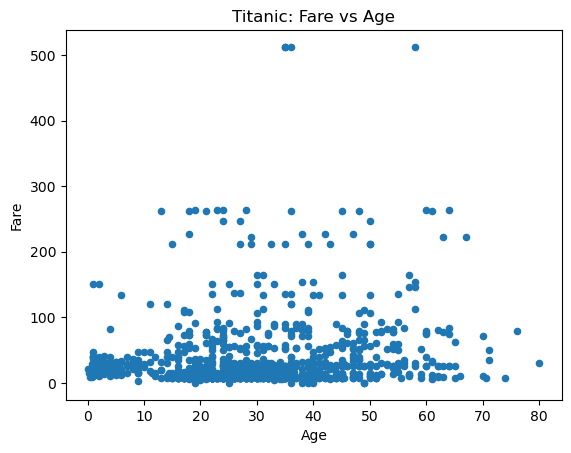

In [119]:
ax = titanic_df.plot.scatter(x="age", y="fare")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
ax.set_title("Titanic: Fare vs Age")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

#### 2.14
rubric={points}

Create a bar chart of `embarked` values. 

> Make sure to name the axes and give a title to your plot. 

<div class="alert alert-warning">

Your solution_2.14
    
</div>

_Points:_ 3

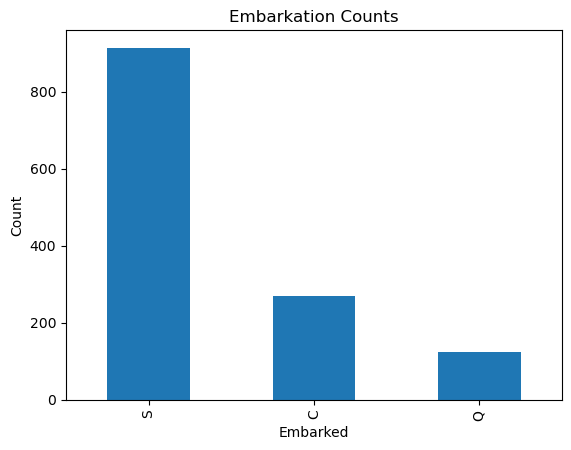

In [120]:
ax = titanic_df["embarked"].value_counts().plot(kind="bar")
ax.set_xlabel("Embarked")
ax.set_ylabel("Count")
ax.set_title("Embarkation Counts")
plt.show()

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Exploring toy user-movie ratings with `NumPy`

In this exercise, you will practice `NumPy` by working with a toy user–item ratings matrix. Each row represents a user, each column represents a movie, and entries are ratings from 1–5. Missing ratings are represented by `np.nan`.

In [125]:
import numpy as np

users = ["Tim", "Jamie", "Carol", "David", "Eva"]
movies = ["Inception", "Frozen", "Titanic", "Avengers", "Toy Story", "Joker"]

R = np.array([
    [5, 3, np.nan, 1, np.nan, 2],   # Tim
    [3, np.nan, 2, 1, 2, np.nan],   # Jamie
    [np.nan, 5, 4, 2, np.nan, 3],   # Carol
    [4, 1, np.nan, np.nan, 3, 2],   # David
    [4, np.nan, 5, 4, 5, np.nan]    # Eva
], dtype=float)

print("Users:", users)
print("Movies:", movies)
print(R)


Users: ['Tim', 'Jamie', 'Carol', 'David', 'Eva']
Movies: ['Inception', 'Frozen', 'Titanic', 'Avengers', 'Toy Story', 'Joker']
[[ 5.  3. nan  1. nan  2.]
 [ 3. nan  2.  1.  2. nan]
 [nan  5.  4.  2. nan  3.]
 [ 4.  1. nan nan  3.  2.]
 [ 4. nan  5.  4.  5. nan]]


The global average rating across all ratings (ignoring missing values) can be computed as: 

In [ ]:
np.nanmean(R)

<br><br>

<!-- BEGIN QUESTION -->

### 3.1 User preferences
rubric={points}

- Compute the average rating given by each user.
- Who is the most generous rater?
- Who is the harshest critic?

<div class="alert alert-warning">

Your solution_3.1
    
</div>

_Points:_ 2

In [126]:
avg_user_ratings = np.nanmean(R, axis=1)
avg_user_ratings

array([2.75, 2.  , 3.5 , 2.5 , 4.5 ])

In [127]:
most_generous_user = users[int(np.nanargmax(avg_user_ratings))]
harshest_critic    = users[int(np.nanargmin(avg_user_ratings))]

In [128]:
print("Most generous rater: ", most_generous_user)
print("Harshest critic: ", harshest_critic)

Most generous rater:  Eva
Harshest critic:  Jamie


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.2 Movie popularity
rubric={points}

- Compute the average rating for each movie.
- Which movie is the most loved?
- Which movie is the least loved?

<div class="alert alert-warning">

Your solution_3.2
    
</div>

_Points:_ 2

In [ ]:
avg_movie_ratings = ...
avg_movie_ratings

In [ ]:
most_loved_movie = ...
least_loved_movie = ...

In [ ]:
print("Most loved movie: ", most_loved_movie)
print("Least loved movie: ", least_loved_movie)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 3.3 Filling missing values
rubric={points}

- Create a new matrix `R_filled` where missing ratings (`np.nan`) are replaced with the movie average for that column.
- After filling, what rating would you predict for Jamie on Frozen?

_Hint: you can use `np.where(condition, A, B)` or specifically np.where(np.isnan(R), …) to selectively replace values._

<div class="alert alert-warning">

Your solution_3.3
    
</div>

_Points:_ 3

In [137]:
col_means = np.nanmean(R, axis=0)
R_filled = np.where(np.isnan(R), col_means, R)
R_filled

array([[5.        , 3.        , 3.66666667, 1.        , 3.33333333,
        2.        ],
       [3.        , 3.        , 2.        , 1.        , 2.        ,
        2.33333333],
       [4.        , 5.        , 4.        , 2.        , 3.33333333,
        3.        ],
       [4.        , 1.        , 3.66666667, 2.        , 3.        ,
        2.        ],
       [4.        , 3.        , 5.        , 4.        , 5.        ,
        2.33333333]])

In [138]:
jamie_idx  = users.index("Jamie")
frozen_idx = movies.index("Frozen")
jamie_frozen_rating = R_filled[jamie_idx, frozen_idx]
print("Jamie's rating on Frozen:", jamie_frozen_rating)

Jamie's rating on Frozen: 3.0


<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top. 

Here is a quick checklist before submitting: 

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  


Well done!!

![](img/eva-well-done.png)